In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath='../Datasets/TS_Course_Data/book_sales.csv'
# filePath is path of csv file we want to read
# index_col = 'Date' : specifies that the column 'Date' of the CSV file should be used as the index
#  parse_dates=['Date'] : Tells pandas to interpret the 'Date' column as dates insteaed fo strings
df = pd.read_csv(
    filePath,
    index_col='Date',
    parse_dates=['Date'],
).drop('Paperback', axis=1)
#  .drop('Paperback',axis=1) : specifies the name of the column to be droped. 0,1-> row,column (what we are dropping)
df.head()
# df.head() will show the first 5 entries

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [3]:
# Creating Time Step Feature
df['Time'] = np.arange(len(df.index))
# df['Time'] will create a new column, or overwrite an existing column
# len(df.index) : calculates the number of rows by determining the length of the index
# np.arange(N) : generates an array of N elements
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


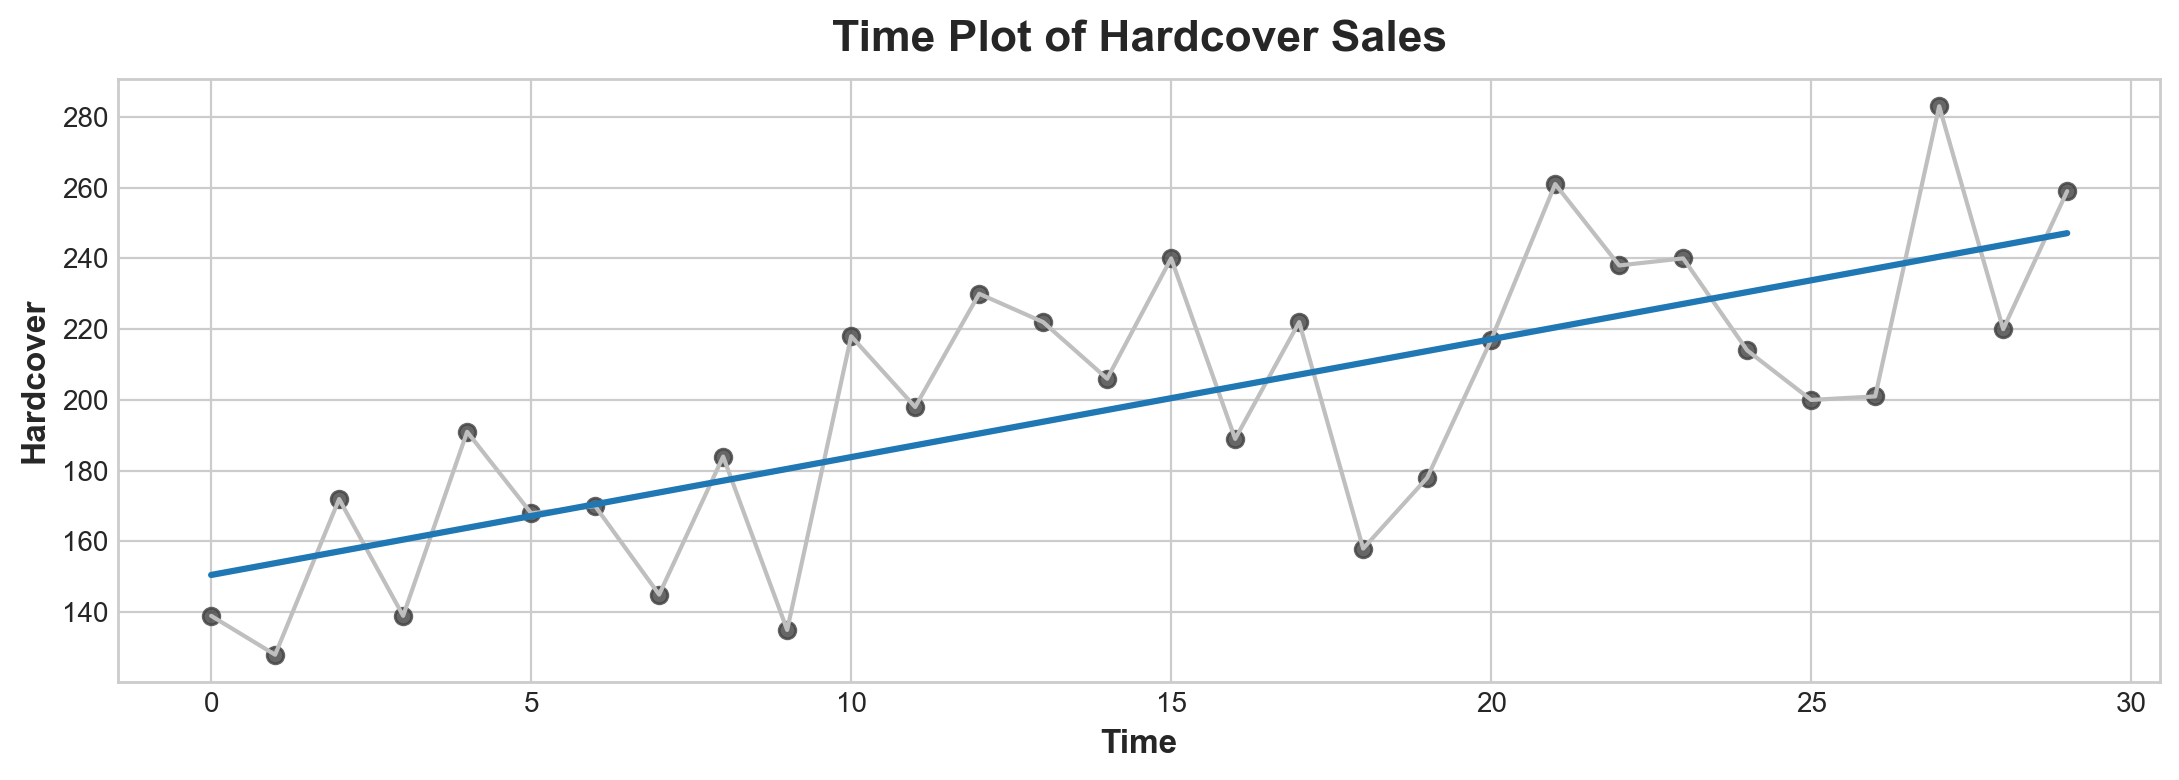

In [5]:
plt.style.use("seaborn-v0_8-whitegrid")
# Originally "seaborn-whitegrid" had to change it to get it to work. Refer to previous cell
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
# "figure" : configures the figure properties globally
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
#  'axes' : configures the axes properties globally
%config InlineBackend.figure_format = 'retina'
# This IPython magic command improves the 
# resolution of plots displayed in Jupyter notebooks, 
# making them clearer and more detailed, especially on high-resolution displays.

fig, ax = plt.subplots()
# Creates a new figure and a single subplot. This is where the plotting will occur.
ax.plot('Time', 'Hardcover', data=df, color='0.75')
# plots a line graph of hardcover sales over time using data from the DataFrame df
# color: greyscale value, where 0 is black and 1 is white
# Grey line, no points plotted
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
# Overlays a regression plot on the same axes (ax) using Seaborn. 
# It plots the relationship between 'Time' and 'Hardcover' sales, 
# fitting and displaying a regression line (default is blue)
# ci=None disables the confidence interval around the regression line
# scatter_kws=dict(color='0.25') sets the scatter plot points to a dark grey.
ax.set_title('Time Plot of Hardcover Sales');
# Sets the title of the plot

In [6]:
# This code is intended for visualizing the relationship between time and hardcover sales, 
# showing individual sales data points along with a regression line that indicates the overall trend. 
# It's a good example of combining Matplotlib's detailed configuration capabilities with 
# Seaborn's high-level interface for statistical plots.

# Note: These are sales that occured over the course of a month.
# Observation: Sales at the end of the month tend to be higher than the begining of the month 
# (according to the course)

In [7]:
df['Lag_1'] = df['Hardcover'].shift(1)
# This line creates a new column in the DataFrame named 'Lag_1'
# The .shift(1) method is used on the 'Hardcover' 
# column to shift its values down by one row, effectively creating a lag of 1

df = df.reindex(columns=['Hardcover', 'Lag_1'])
# This line changes the order of columns in df to specifically list 'Hardcover' and 'Lag_1' first. 
# reindex(columns=[...]) method is used to specify the new column order

# df.size
# df.tail()
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


In [8]:
# lagged values of a variable are used as predictors for modeling, 
# or for analyzing the relationship between a variable and its past values.

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

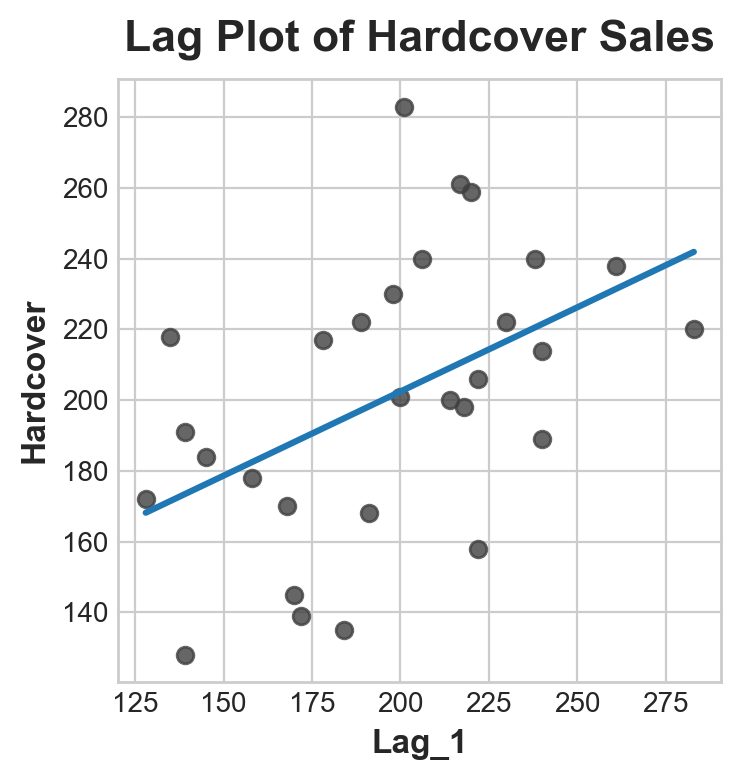

In [9]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

In [10]:
# Observation: we can predict that high sales on one day usually mean high sales the next day